In [6]:
%load_ext autoreload
%autoreload 2

In [88]:
import pandas as pd
import geopandas as gpd
import sweden
import netherlands
import saopaulo
import australia
import population_representation as poprep
from matplotlib.patches import Patch, ConnectionPatch
import matplotlib.transforms as mplt
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import regions
import geostat

In [11]:
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 18.0

# Sweden

In [12]:
region = "sweden"

In [14]:
swe_homes = poprep.twitter_home_locations(region)

In [59]:
mask = regions.counties.convex_hull.unary_union.convex_hull
census_homes = geostat.load(mask=regions.counties.convex_hull.unary_union.convex_hull)
swe_homes = swe_homes.to_crs(census_homes.crs)

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [60]:
counties = regions.counties.set_index('ID')
municipalities = gpd.read_file("../../dbs/sweden_municipalities/sweden_municipalities.shp").rename(columns={"KnKod": "ID"}).set_index("ID")
counties = counties.to_crs(census_homes.crs)
municipalities = municipalities.to_crs(census_homes.crs)

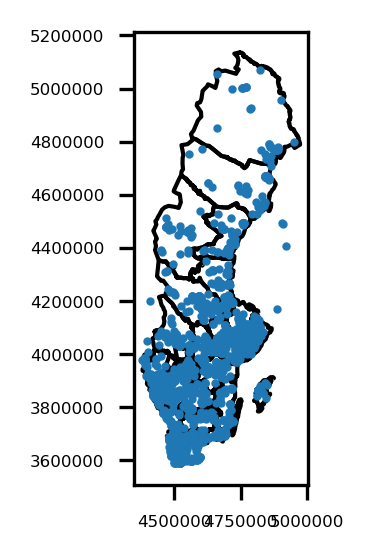

In [61]:
poprep.plot_home_locations(counties, swe_homes)

In [42]:
counties = poprep.align_populations(counties, swe_homes, census_homes)
municipalities = poprep.align_populations(municipalities, swe_homes, census_homes)

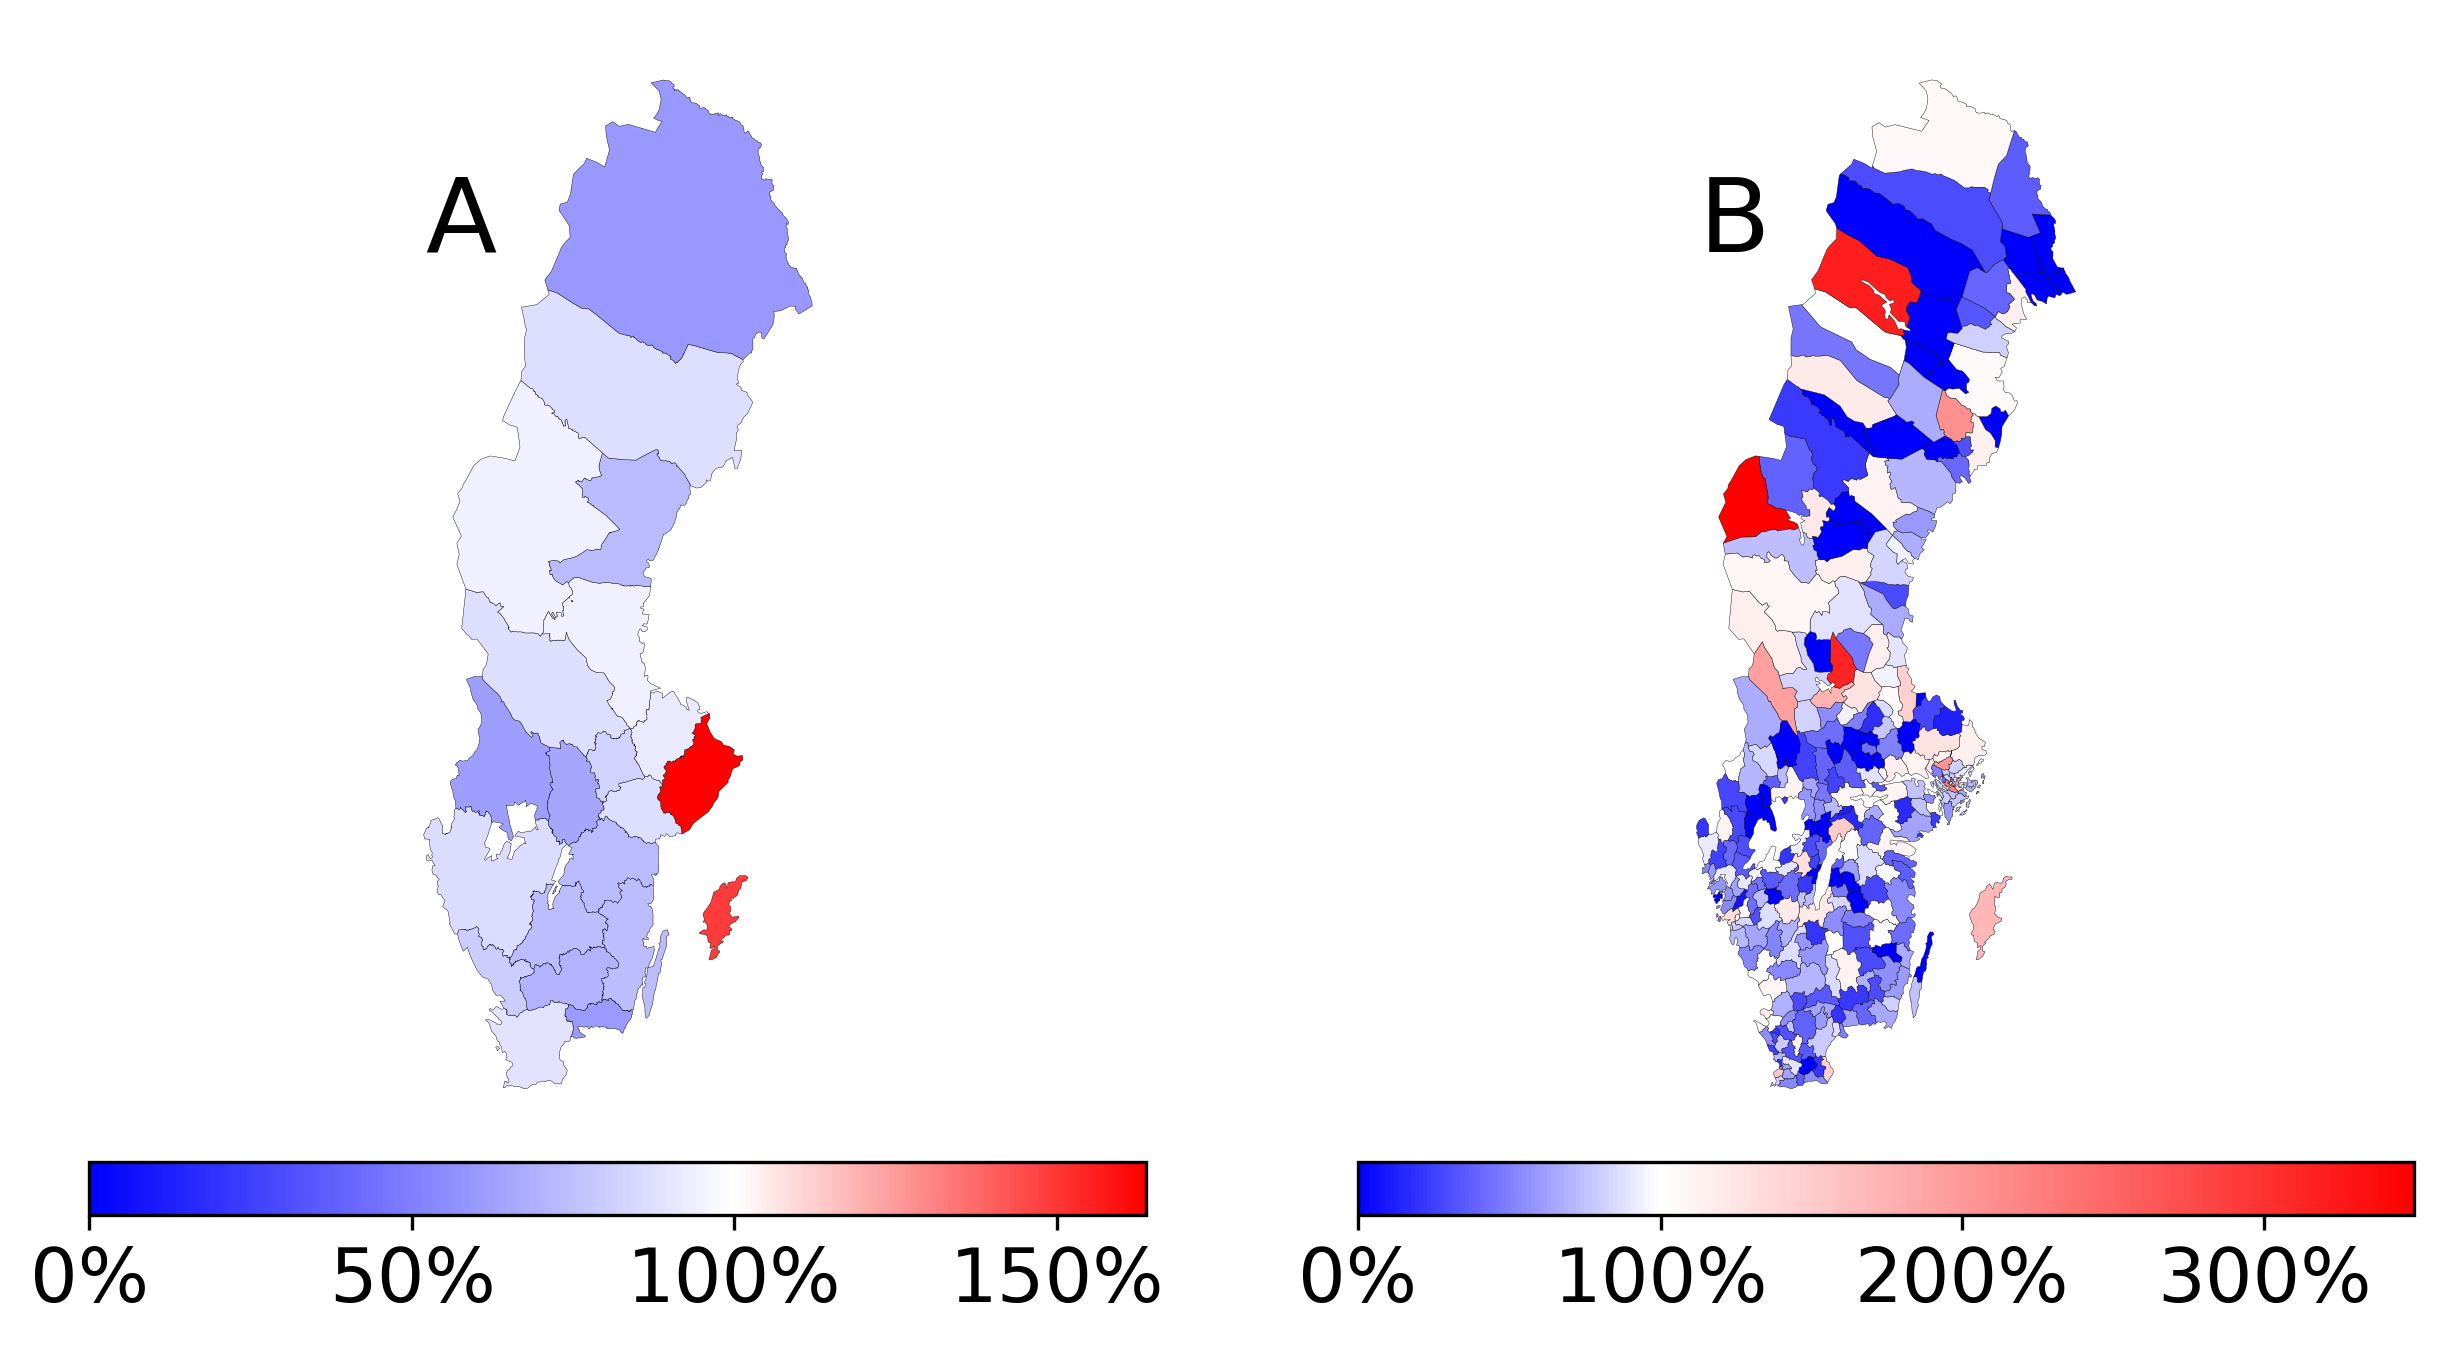

In [45]:
poprep.plot_geo_rep(counties, municipalities, ticks1=[0, 0.5, 1, 1.5], ticks2=[0, 1, 2, 3])

(0.0001, 0.5)

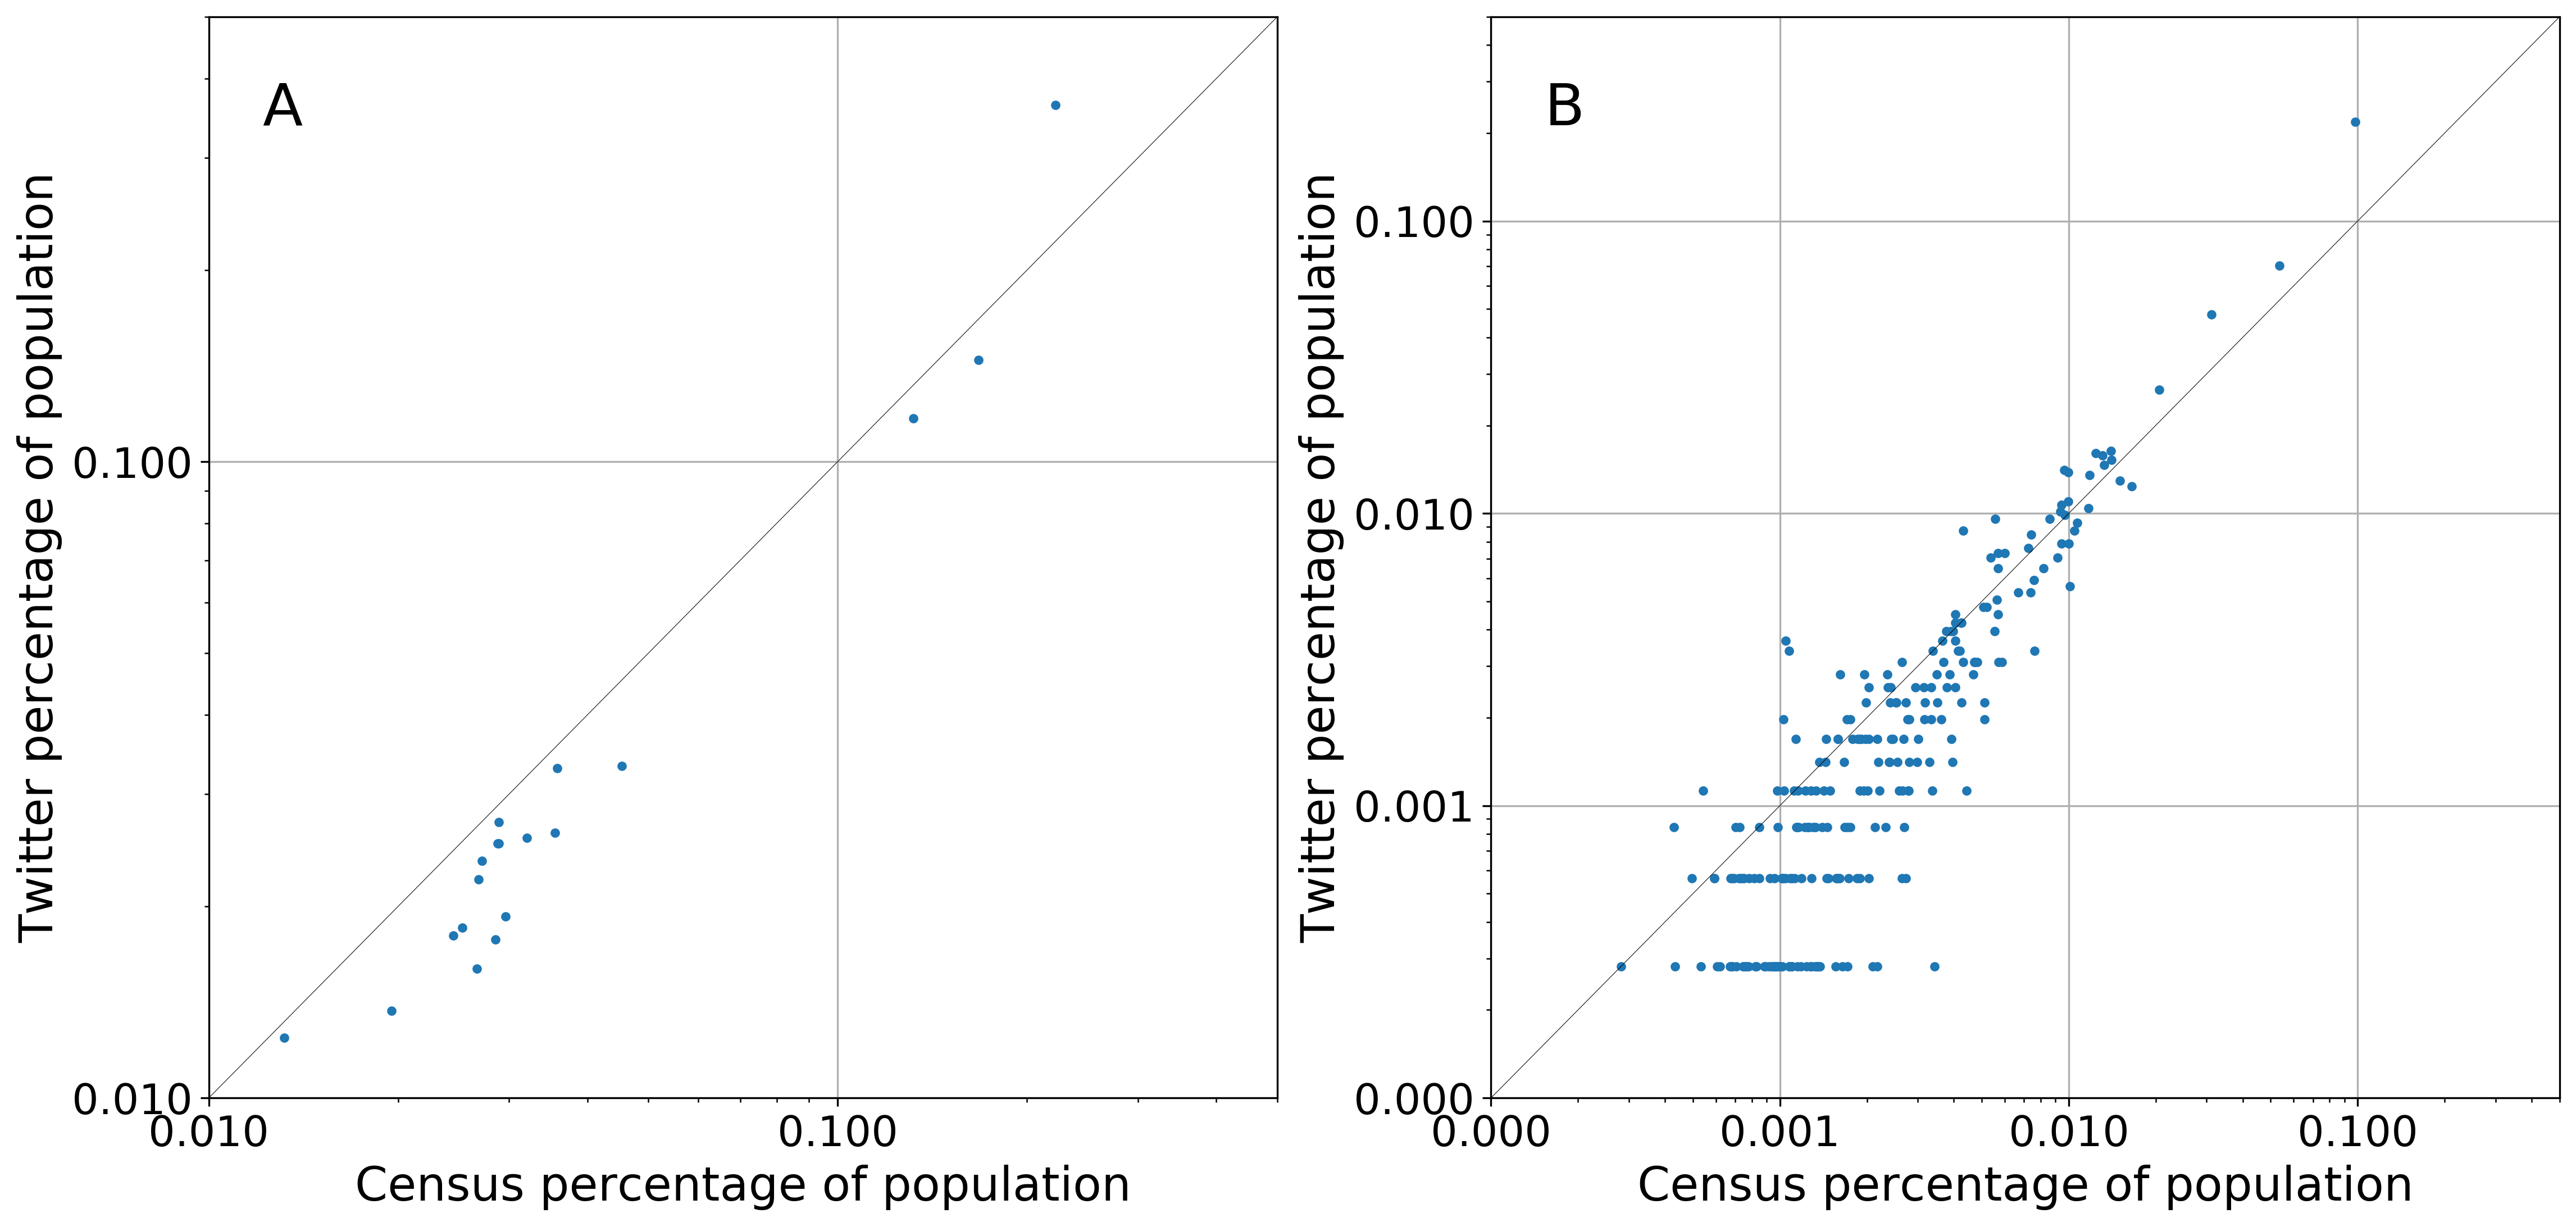

In [46]:
ax0, ax1 = poprep.plot_corr(counties, municipalities)
ax0.set_xlim((0.01, 0.5))
ax0.set_ylim((0.01, 0.5))
ax1.set_xlim((0.0001, 0.5))
ax1.set_ylim((0.0001, 0.5))

# Netherlands

In [48]:
region = "netherlands"

In [50]:
neth_homes = poprep.twitter_home_locations(region)

In [64]:
mask = netherlands.municipalities.to_crs("EPSG:3035").convex_hull.unary_union.convex_hull
census_homes = geostat.load(mask=mask)

/Users/kristofferek/miniconda3/envs/mscthesis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [65]:
counties = netherlands.counties
municipalities = netherlands.municipalities
counties = counties.to_crs(census_homes.crs)
counties = counties.rename(columns={'id':'ID'}).set_index('ID')
counties = counties[counties['name'] != 'Caribbean Netherlands']
municipalities = municipalities.to_crs(census_homes.crs)
municipalities = municipalities.rename(columns={'GM_CODE':'ID'}).set_index('ID')
neth_homes = neth_homes.to_crs(census_homes.crs)

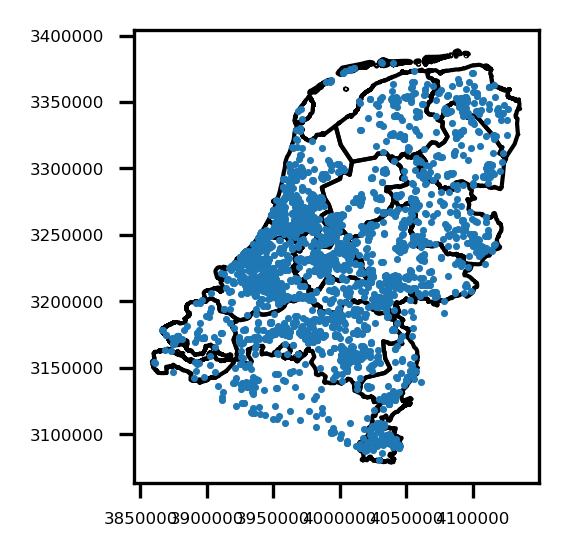

In [94]:
poprep.plot_home_locations(counties, neth_homes)

In [69]:
counties = poprep.align_populations(counties, neth_homes, census_homes)
municipalities = poprep.align_populations(municipalities, neth_homes, census_homes)

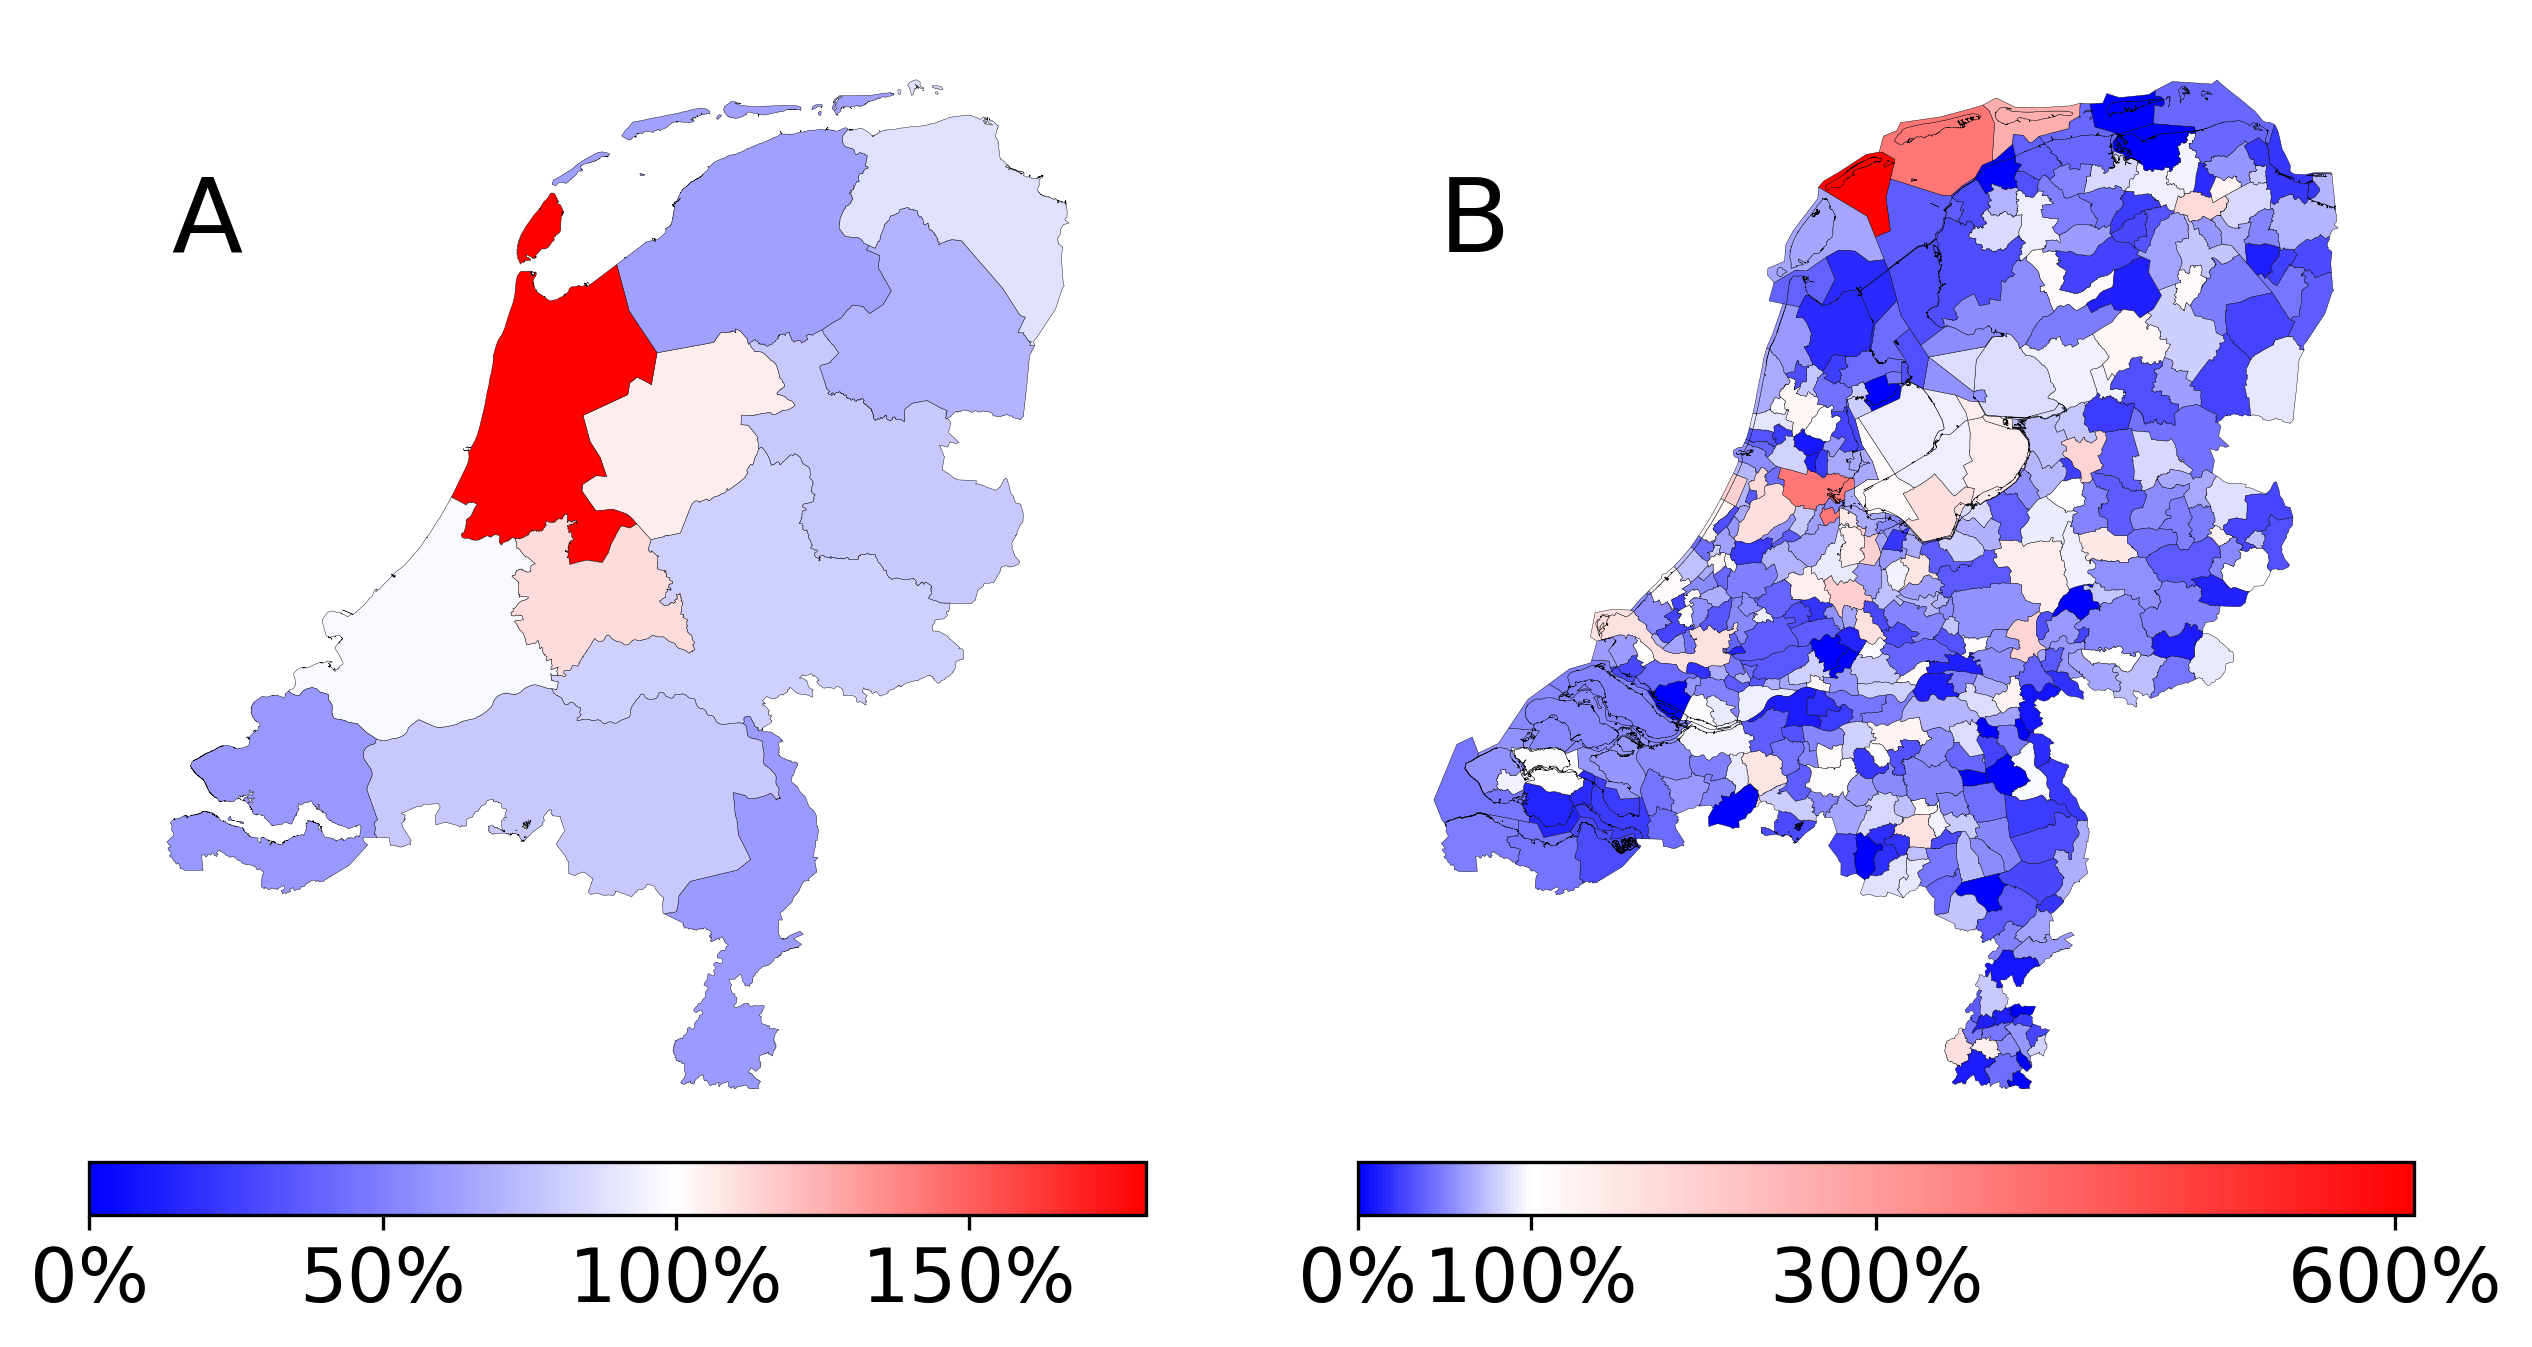

In [71]:
poprep.plot_geo_rep(counties, municipalities, ticks1=[0, 0.5, 1, 1.5], ticks2=[0, 1, 3, 6])

(1e-05, 0.5)

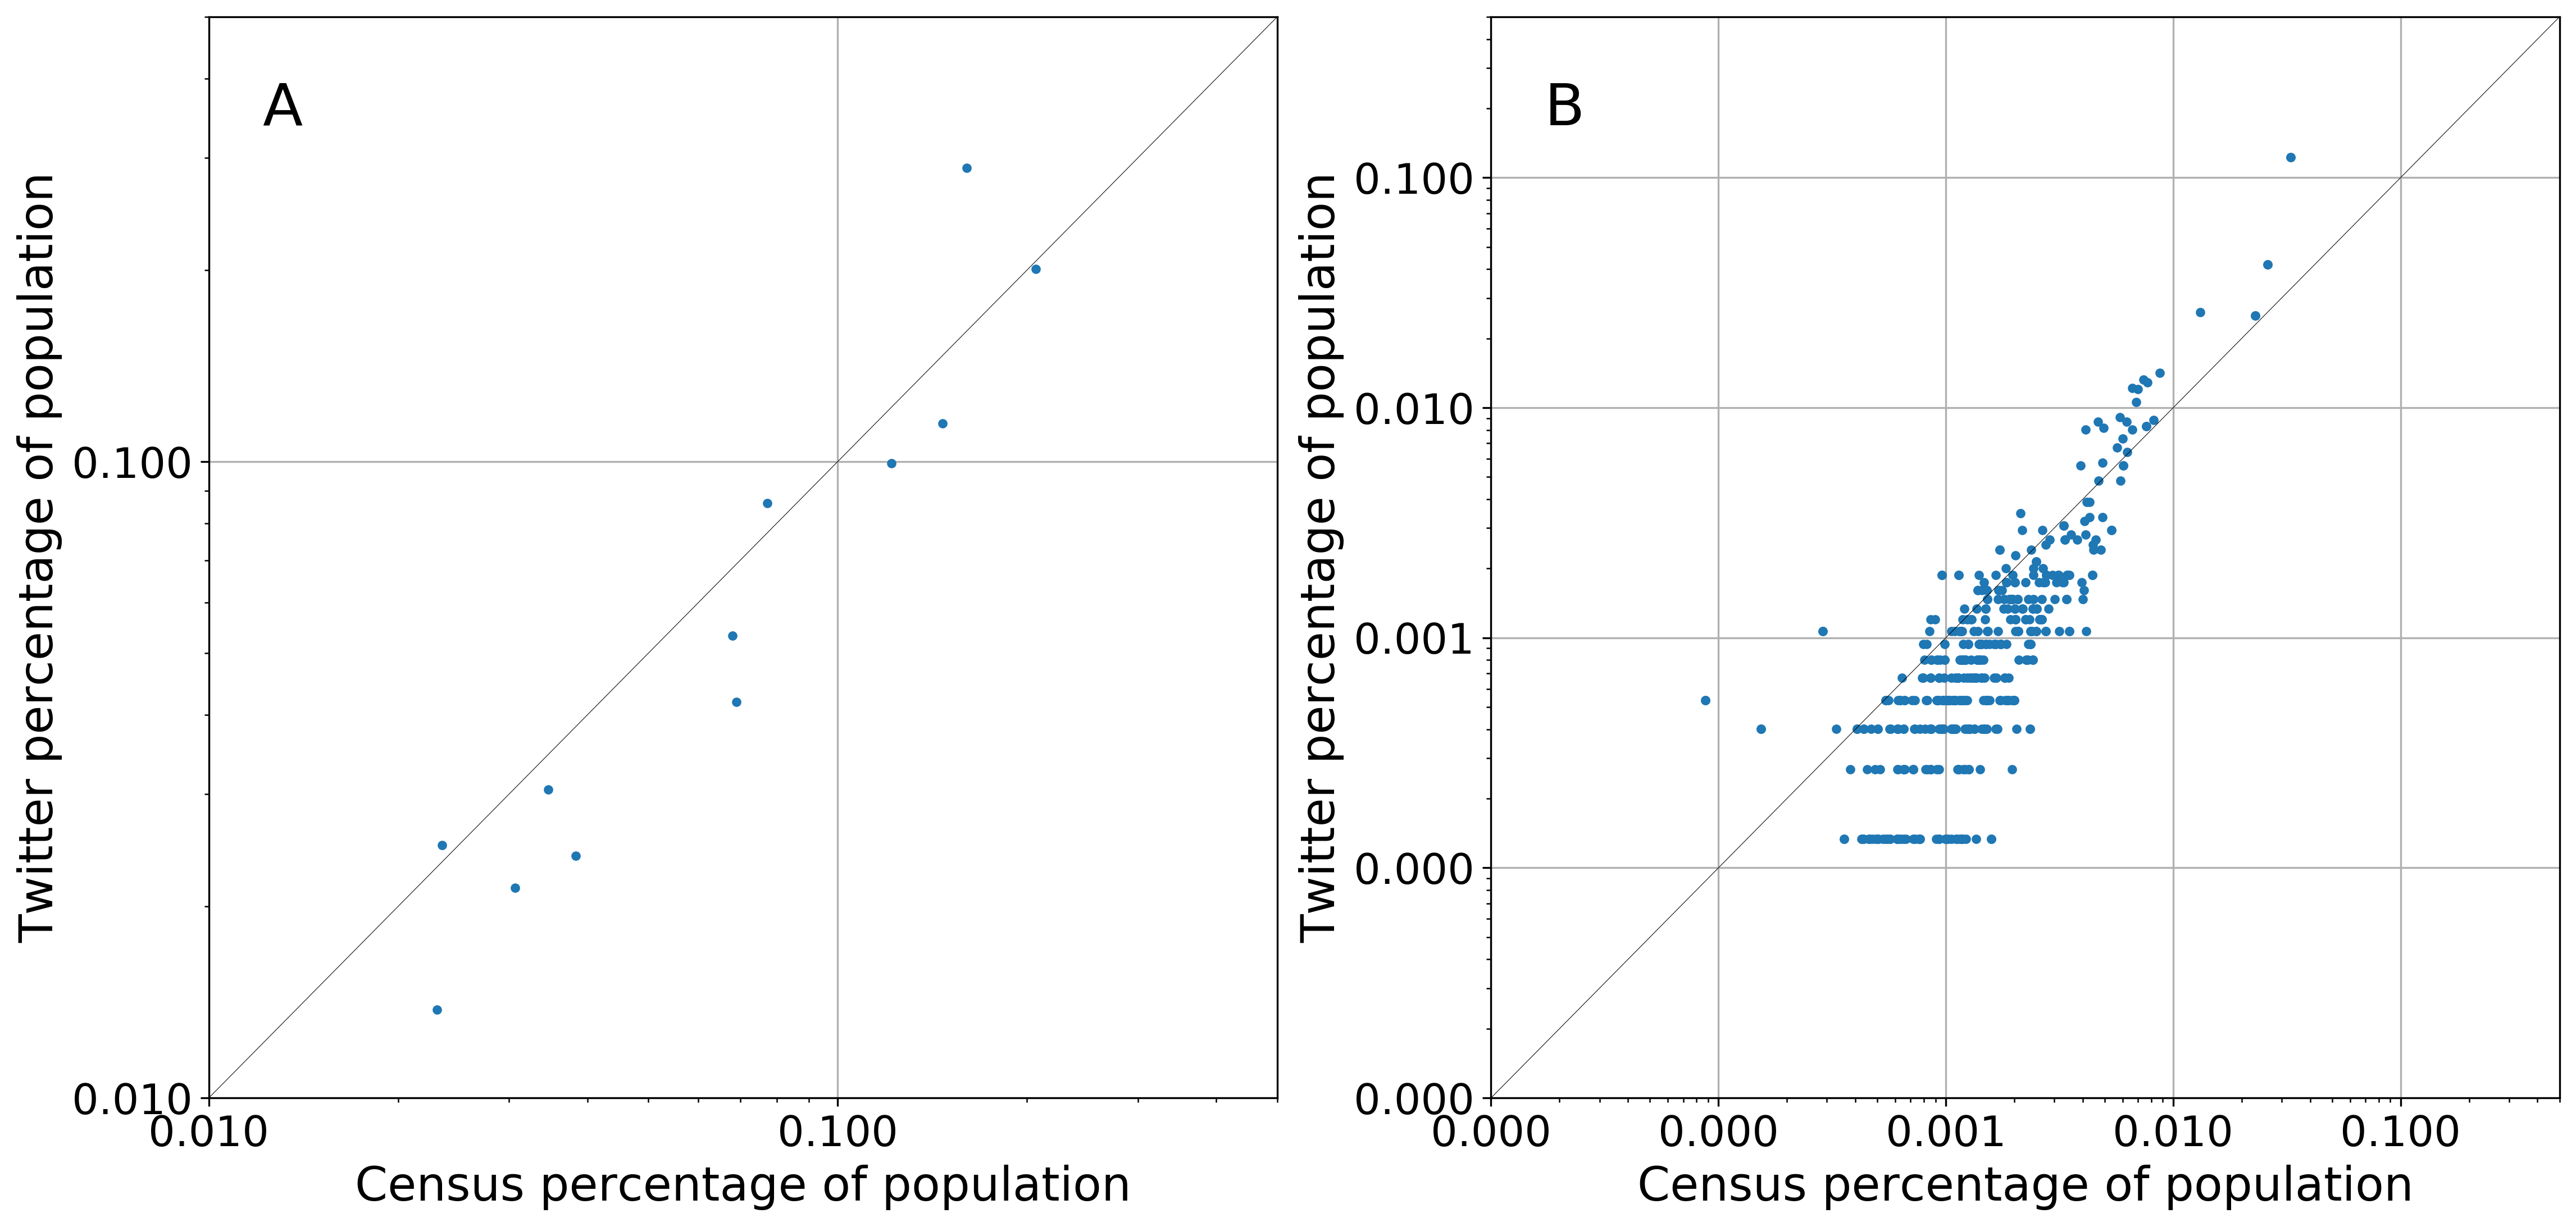

In [81]:
ax0, ax1 = poprep.plot_corr(counties, municipalities)
ax0.set_xlim((0.01, 0.5))
ax0.set_ylim((0.01, 0.5))
ax1.set_xlim((0.00001, 0.5))
ax1.set_ylim((0.00001, 0.5))

# Sao Paulo

In [105]:
sao_twitter = poprep.twitter_home_locations("saopaulo").to_crs(saopaulo.metric_epsg)

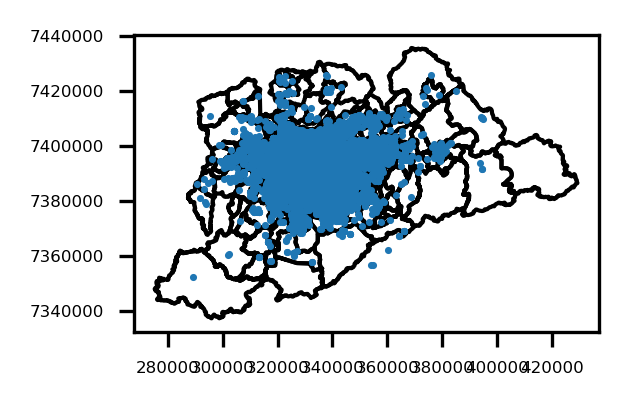

In [106]:
census_homes = saopaulo.zone_populations()
census_homes = census_homes[census_homes['census_population'] != 0.]
poprep.plot_home_locations(census_homes, sao_twitter)

In [107]:
study_zone = poprep.align_populations_aus_sao(census_homes, sao_twitter)
study_zone.sort_values('perc_of_census', ascending=False).head(5)

geometry  census_population  \
zone                                                                         
92    POLYGON Z ((329415.917 7397362.208 0.000, 3296...         324.000065   
94    POLYGON Z ((327970.633 7397510.783 0.000, 3279...        3993.001051   
131   POLYGON Z ((334497.219 7398954.266 0.000, 3344...        1227.000245   
62    POLYGON Z ((331636.998 7389908.935 0.000, 3316...        4564.998437   
1     POLYGON Z ((333739.415 7394619.838 0.000, 3337...        3262.000949   

      twitter  twitter_perc  census_perc  perc_of_census  
zone                                                      
92       22.0      0.002059     0.000016      132.305528  
94      107.0      0.010013     0.000192       52.213735  
131      21.0      0.001965     0.000059       33.348404  
62       74.0      0.006925     0.000219       31.585772  
1        52.0      0.004866     0.000157       31.061303

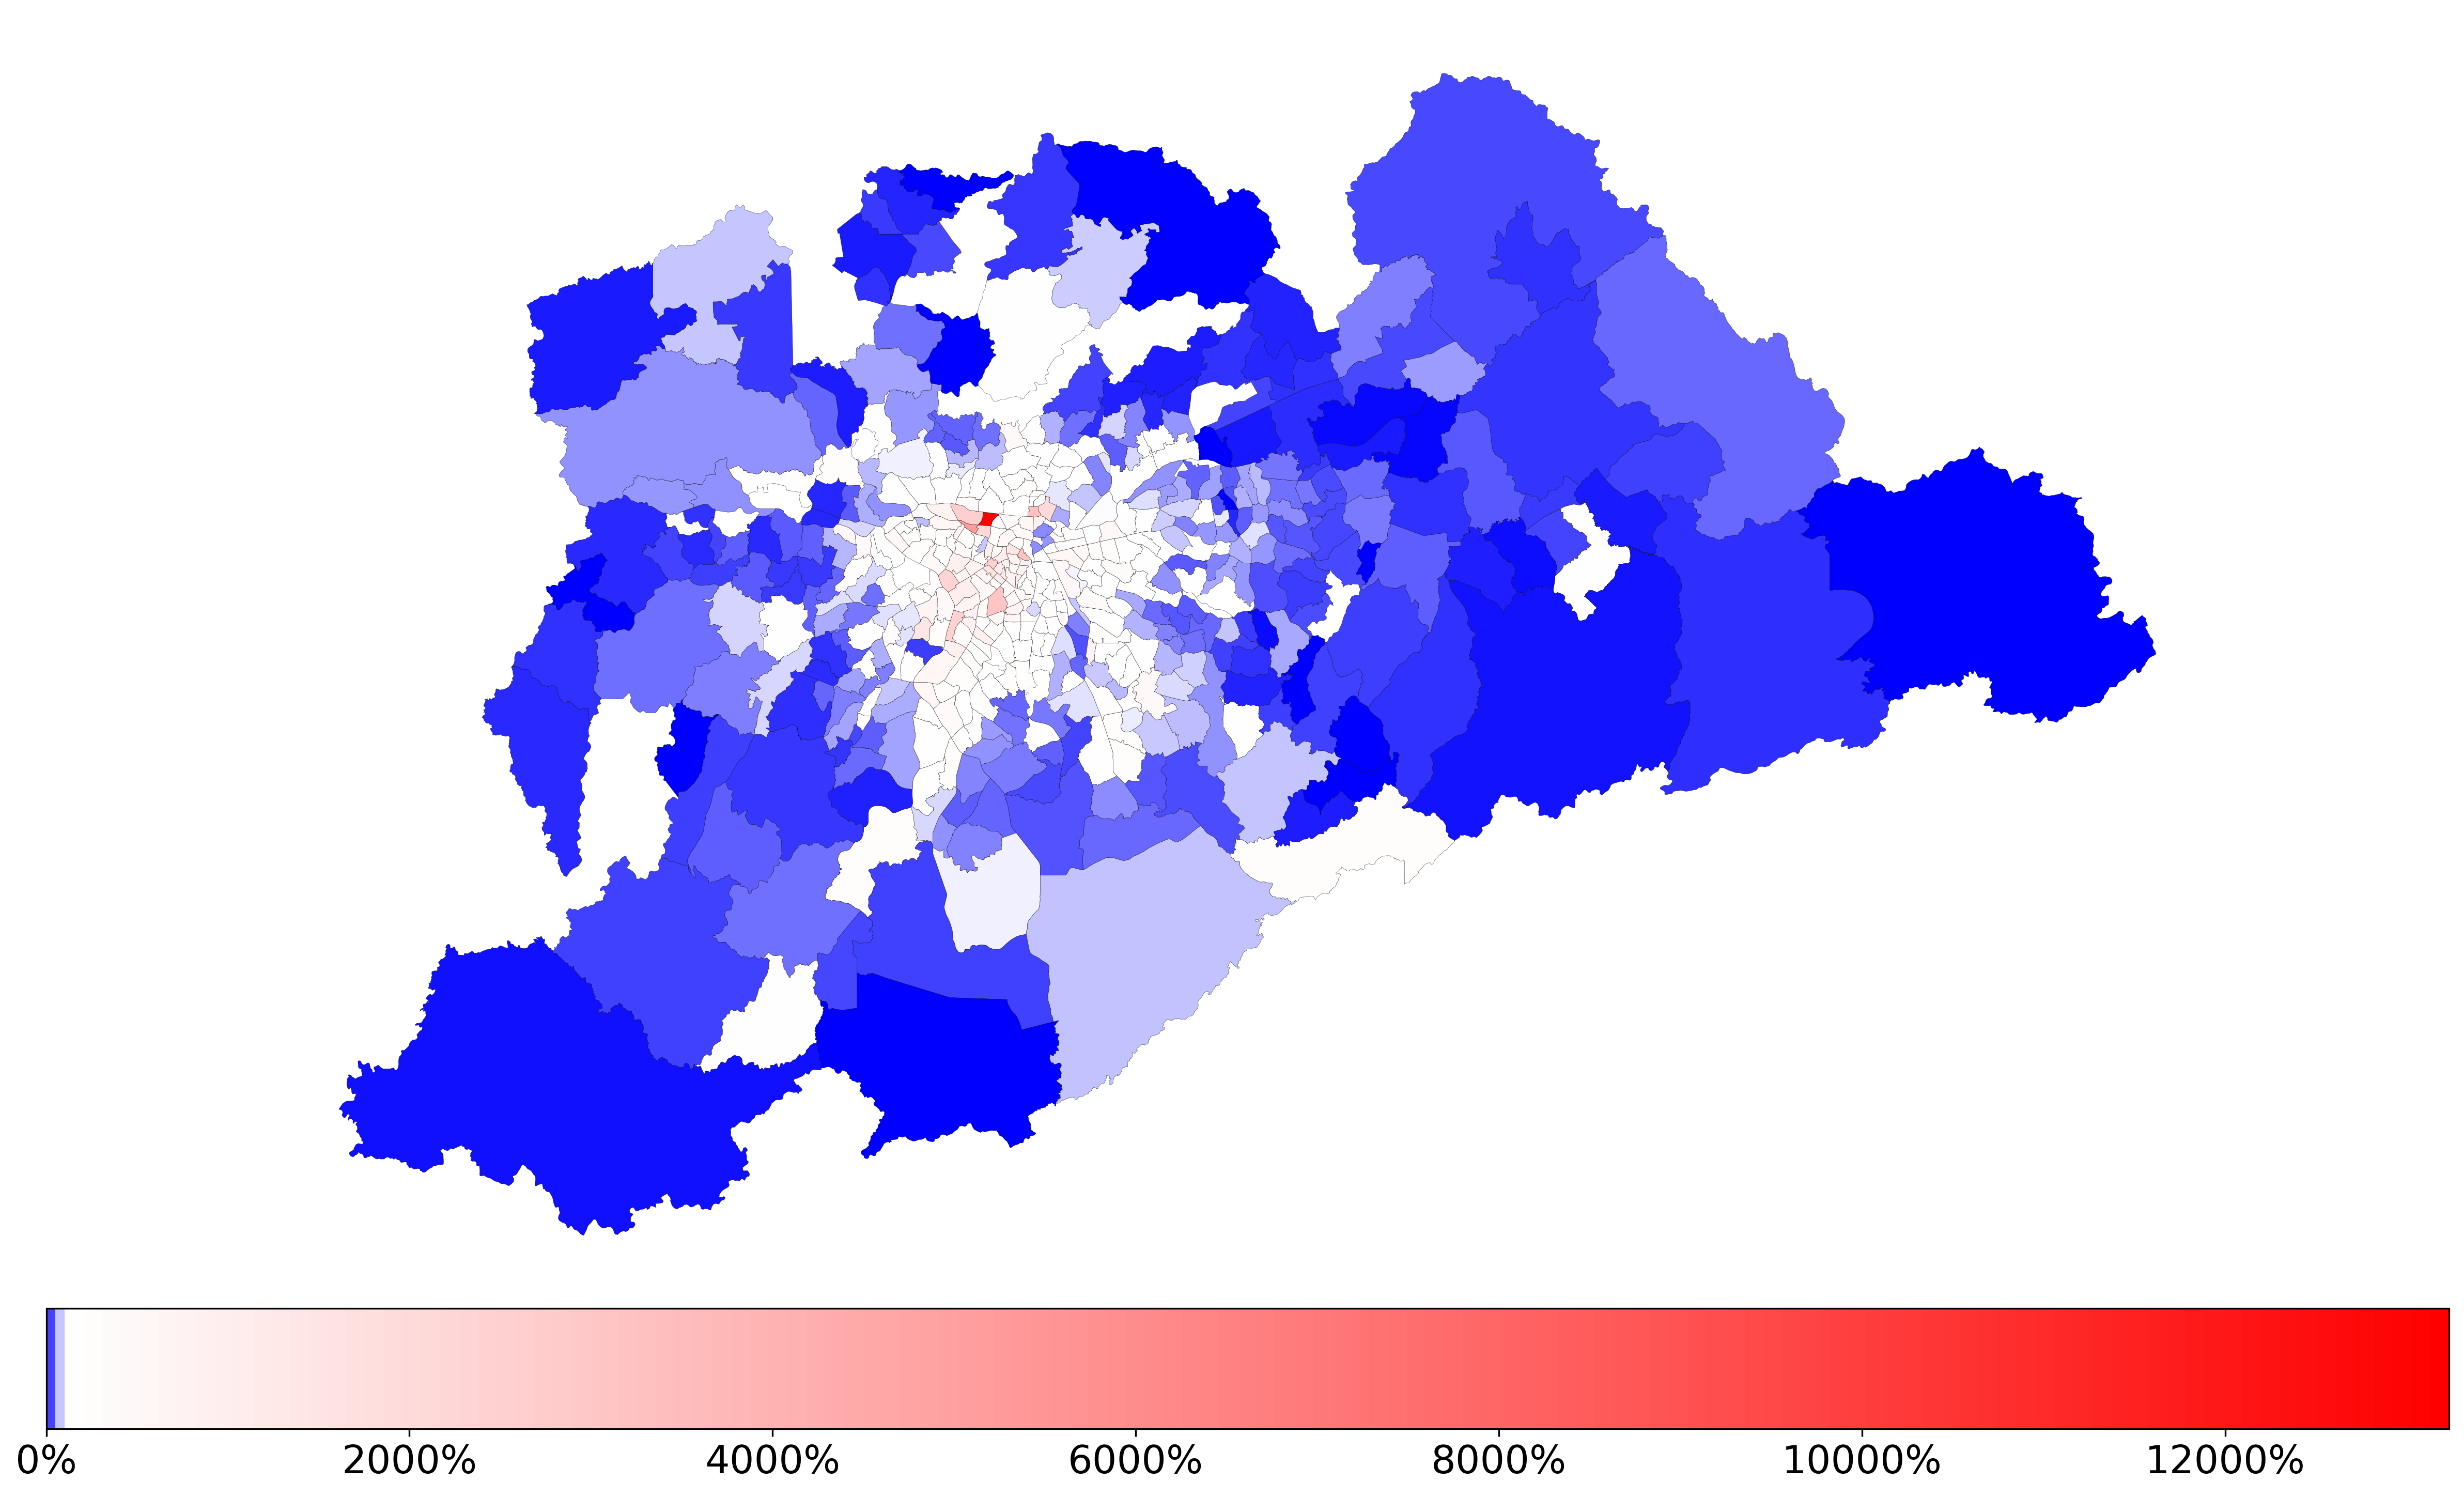

In [108]:
poprep.plot_geo_rep_aus_sao(study_zone)

(1e-05, 0.3)

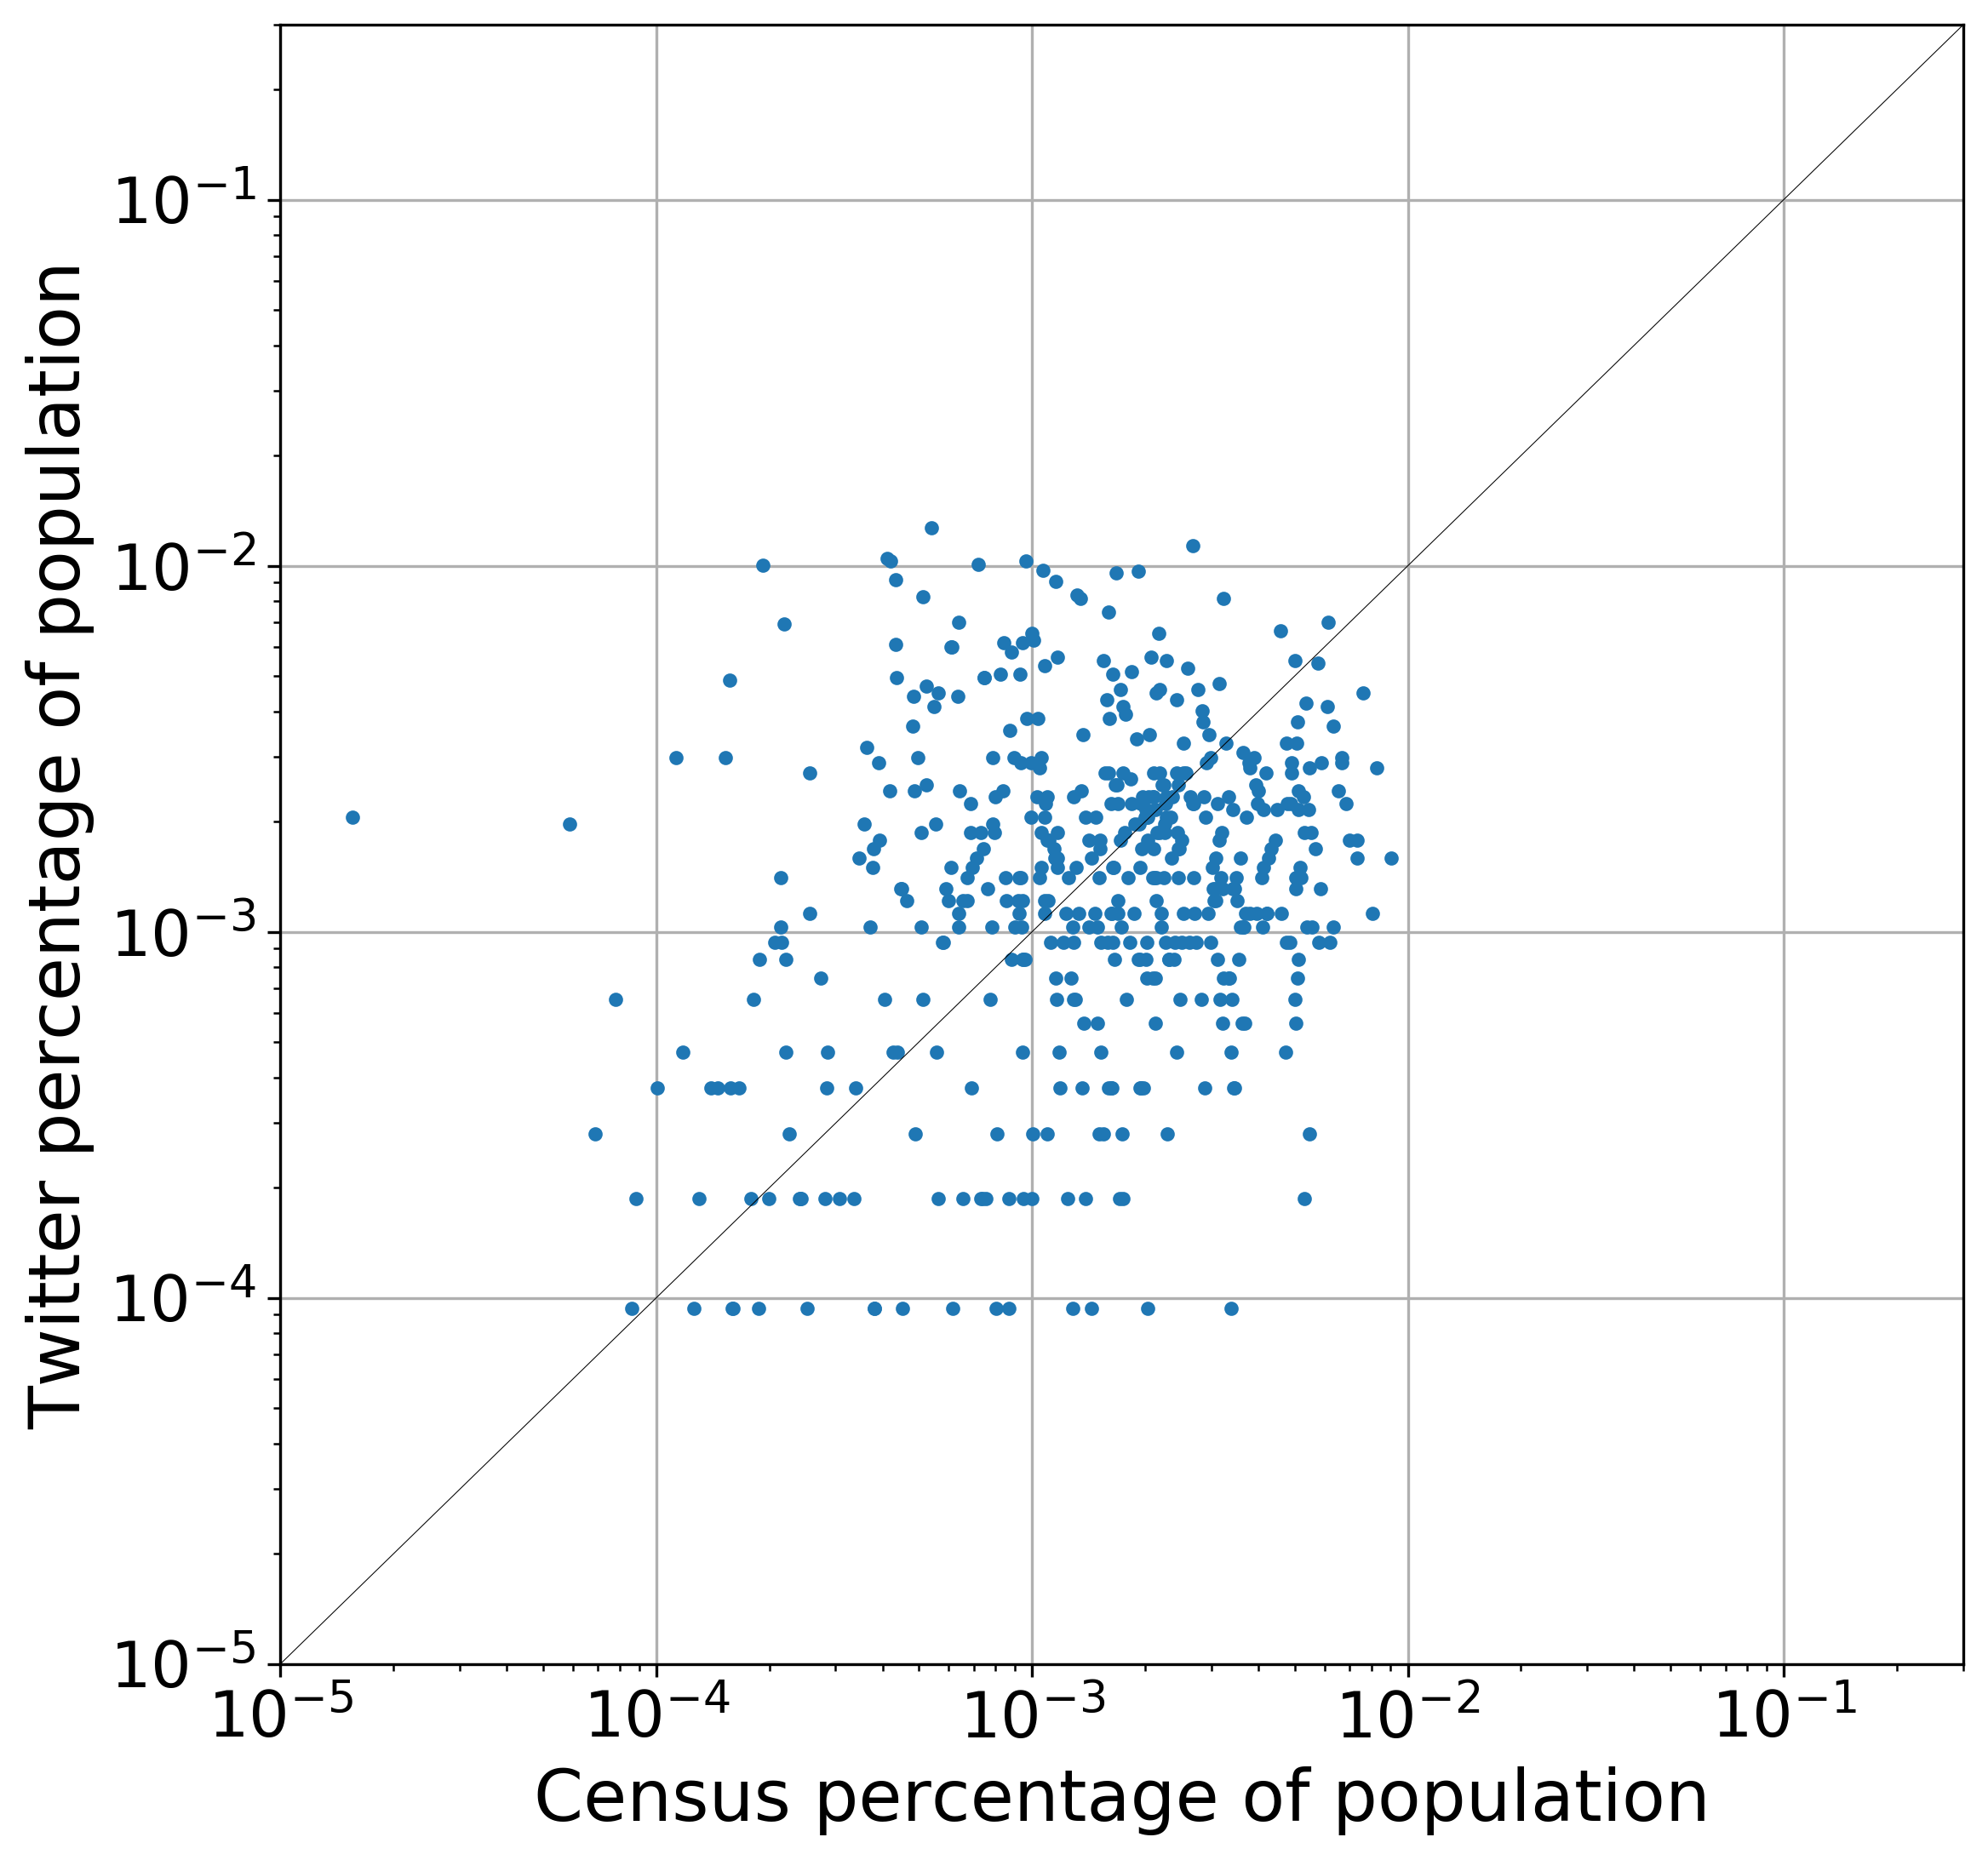

In [109]:
ax = poprep.plot_corr_aus_sao(study_zone)
ax.set_xlim((0.00001, 0.3))
ax.set_ylim((0.00001, 0.3))

# Australia

In [110]:
aus_twitter = poprep.twitter_home_locations("australia").to_crs(australia.metric_epsg)

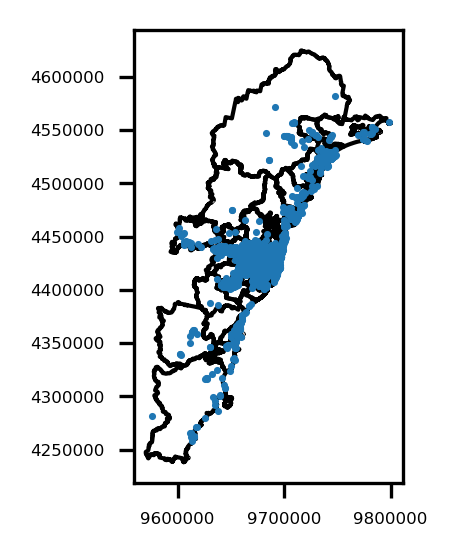

In [116]:
census_homes = australia.zone_populations()
census_homes = census_homes[census_homes['census_population'] != 0.]
poprep.plot_home_locations(census_homes, aus_twitter)

In [117]:
study_zone = poprep.align_populations_aus_sao(census_homes, aus_twitter)
study_zone.sort_values('perc_of_census', ascending=False).head(5)

SA3_NAME16 SA4_CODE16  \
zone                                                    
11703                    Sydney Inner City        117   
11801              Eastern Suburbs - North        118   
12002                           Leichhardt        120   
12201                                Manly        122   
11702  Marrickville - Sydenham - Petersham        117   

                          SA4_NAME16 GCC_CODE16      GCC_NAME16 STE_CODE16  \
zone                                                                         
11703  Sydney - City and Inner South      1GSYD  Greater Sydney          1   
11801       Sydney - Eastern Suburbs      1GSYD  Greater Sydney          1   
12002            Sydney - Inner West      1GSYD  Greater Sydney          1   
12201      Sydney - Northern Beaches      1GSYD  Greater Sydney          1   
11702  Sydney - City and Inner South      1GSYD  Greater Sydney          1   

            STE_NAME16  AREASQKM16  \
zone                                 
11703  New South Wales     25.0641   
11801  New South Wales     26.1849   
12002  New South Wales     10.6577   
12201  New South Wales     14.3455   
11702  New South Wales     12.6699   

                                                geometry  census_population  \
zone                                                                          
11703  MULTIPOLYGON (((9690566.015 4425031.388, 96905...             212000   
11801  MULTIPOLYGON (((9694767.102 4425675.221, 96947...             133000   
12002  MULTIPOLYGON (((9685867.280 4426261.837, 96858...              59000   
12201  POLYGON ((9691864.508 4432033.891, 9691868.906...              40000   
11702  POLYGON ((9683339.934 4420505.768, 9683347.483...              57000   

       twitter  twitter_perc  census_perc  perc_of_census  
zone                                                       
11703      906      0.283924     0.034624        8.200301  
11801      344      0.107803     0.021721        4.963000  
12002       83      0.026011     0.009636        2.699377  
12201       55      0.017236     0.006533        2.638397  
11702       64      0.020056     0.009309        2.154481

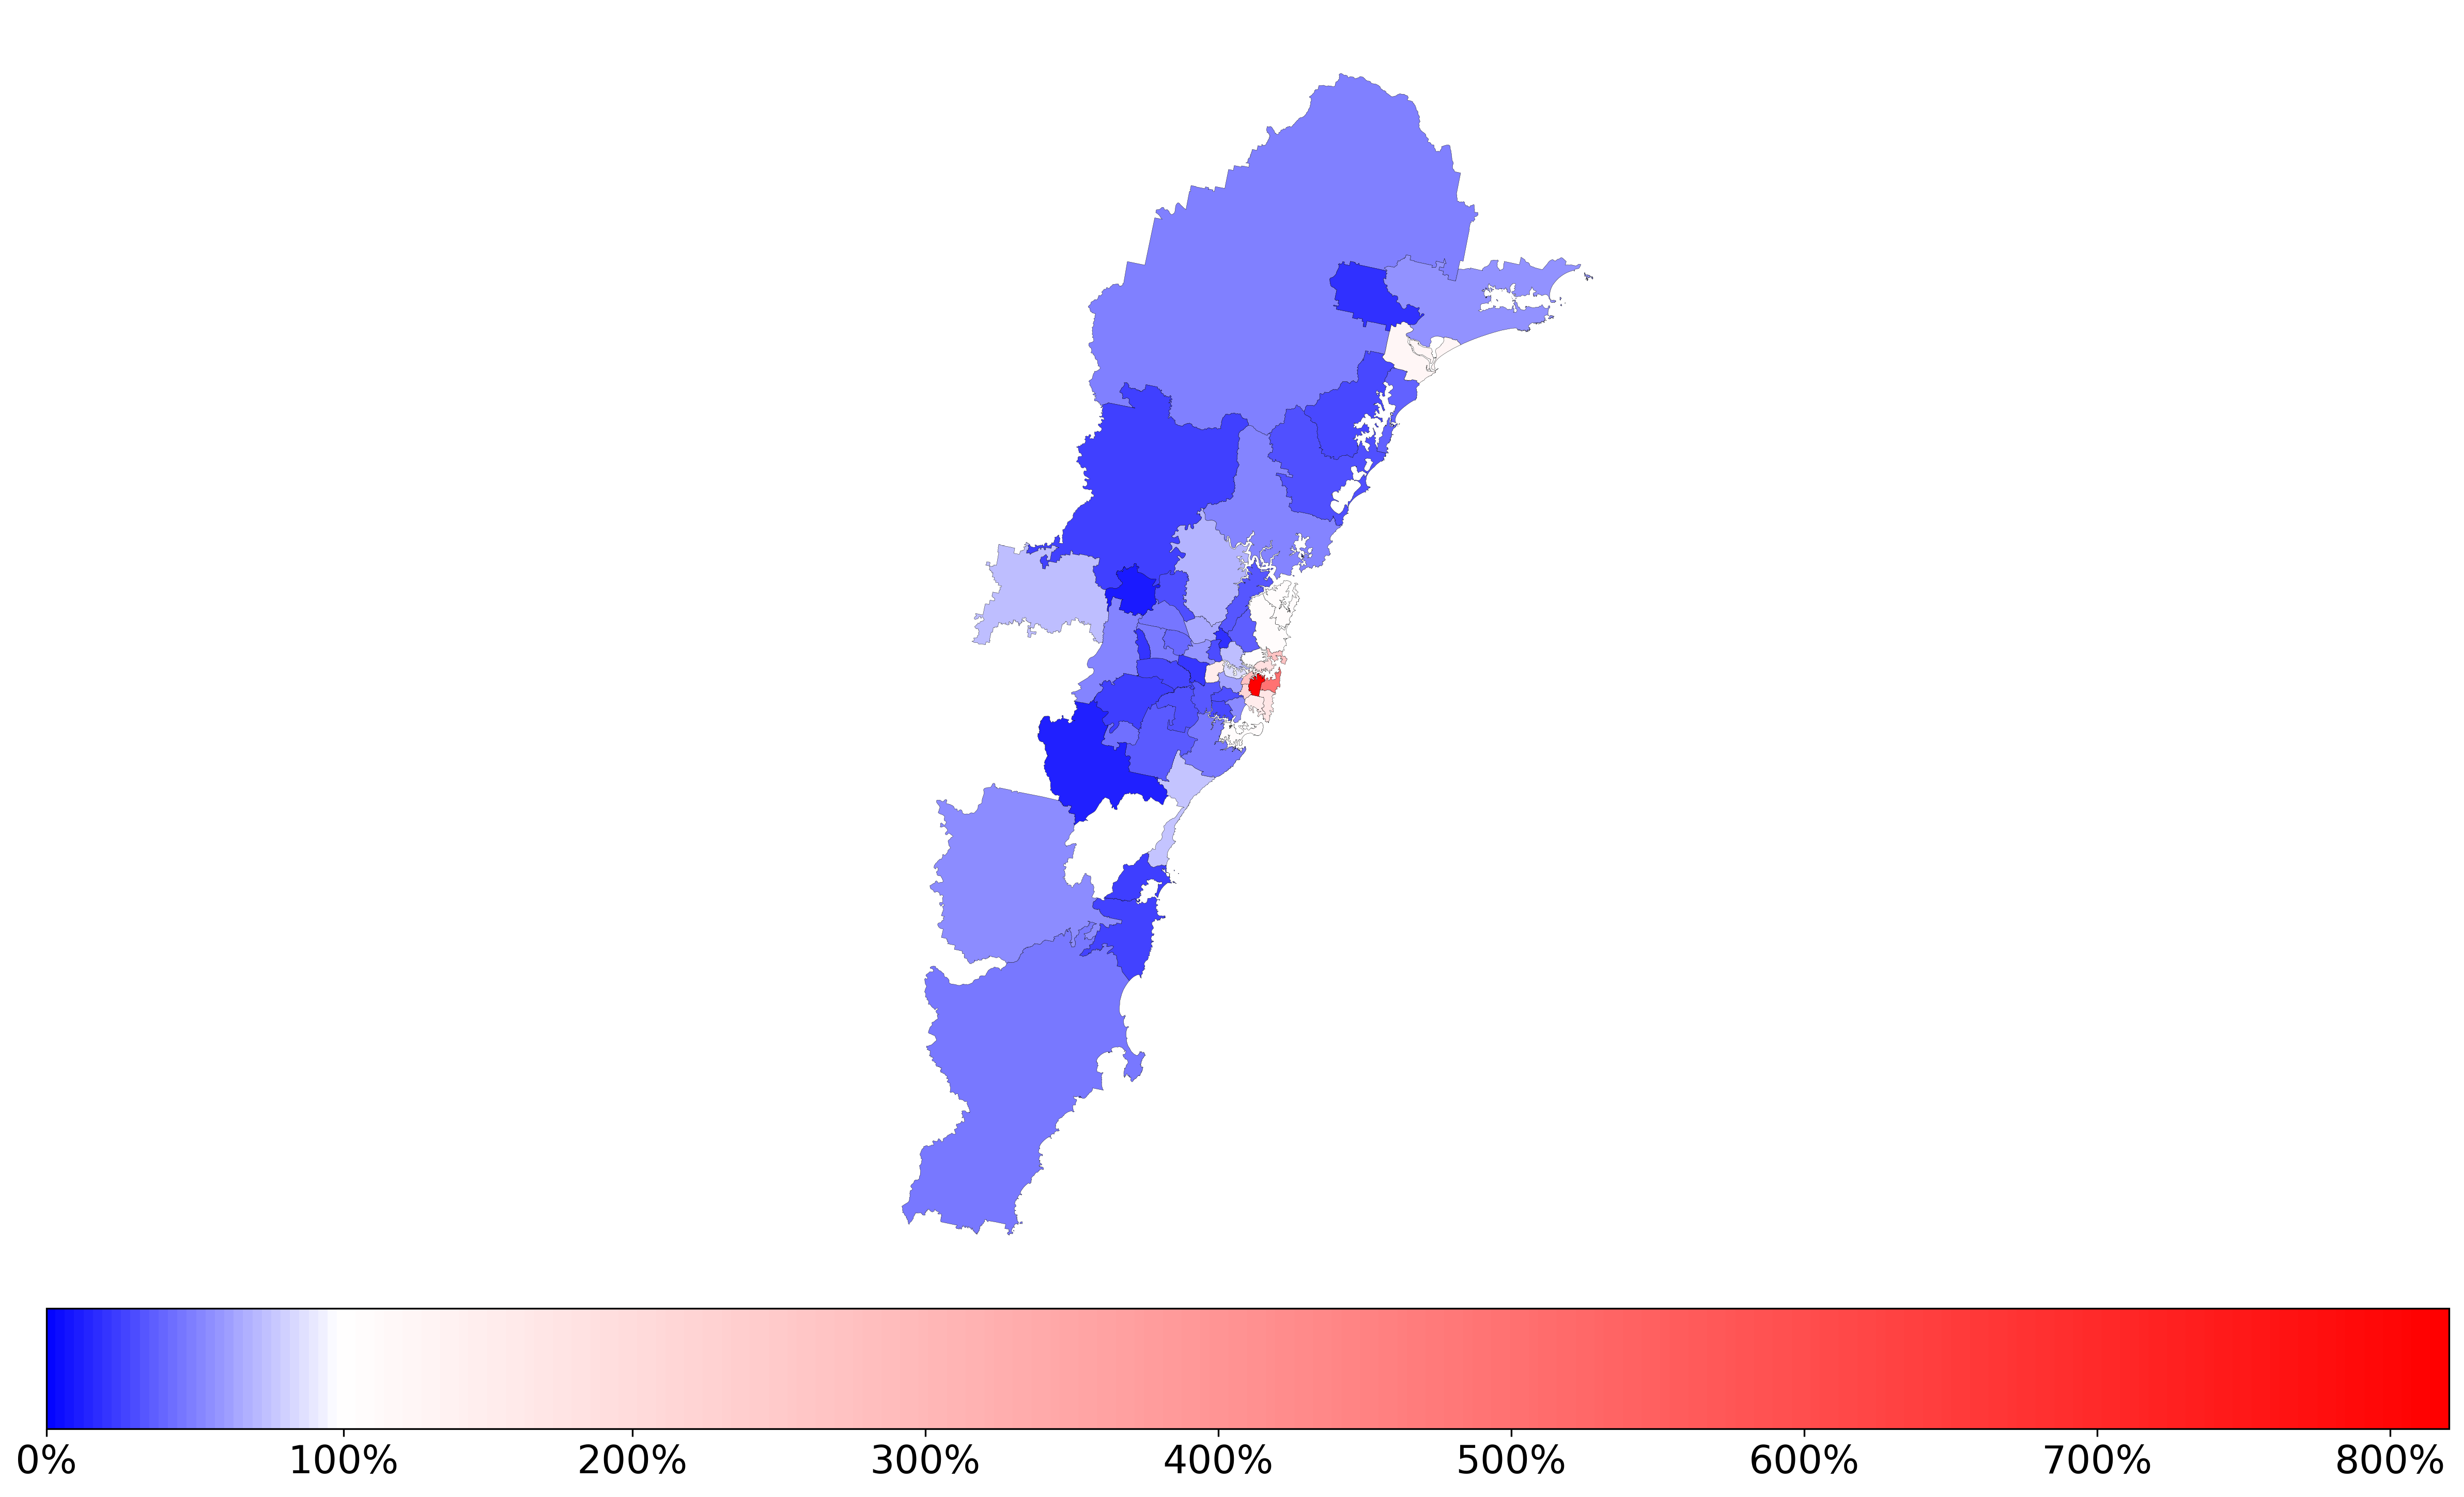

In [118]:
poprep.plot_geo_rep_aus_sao(study_zone)

(0.0005, 0.5)

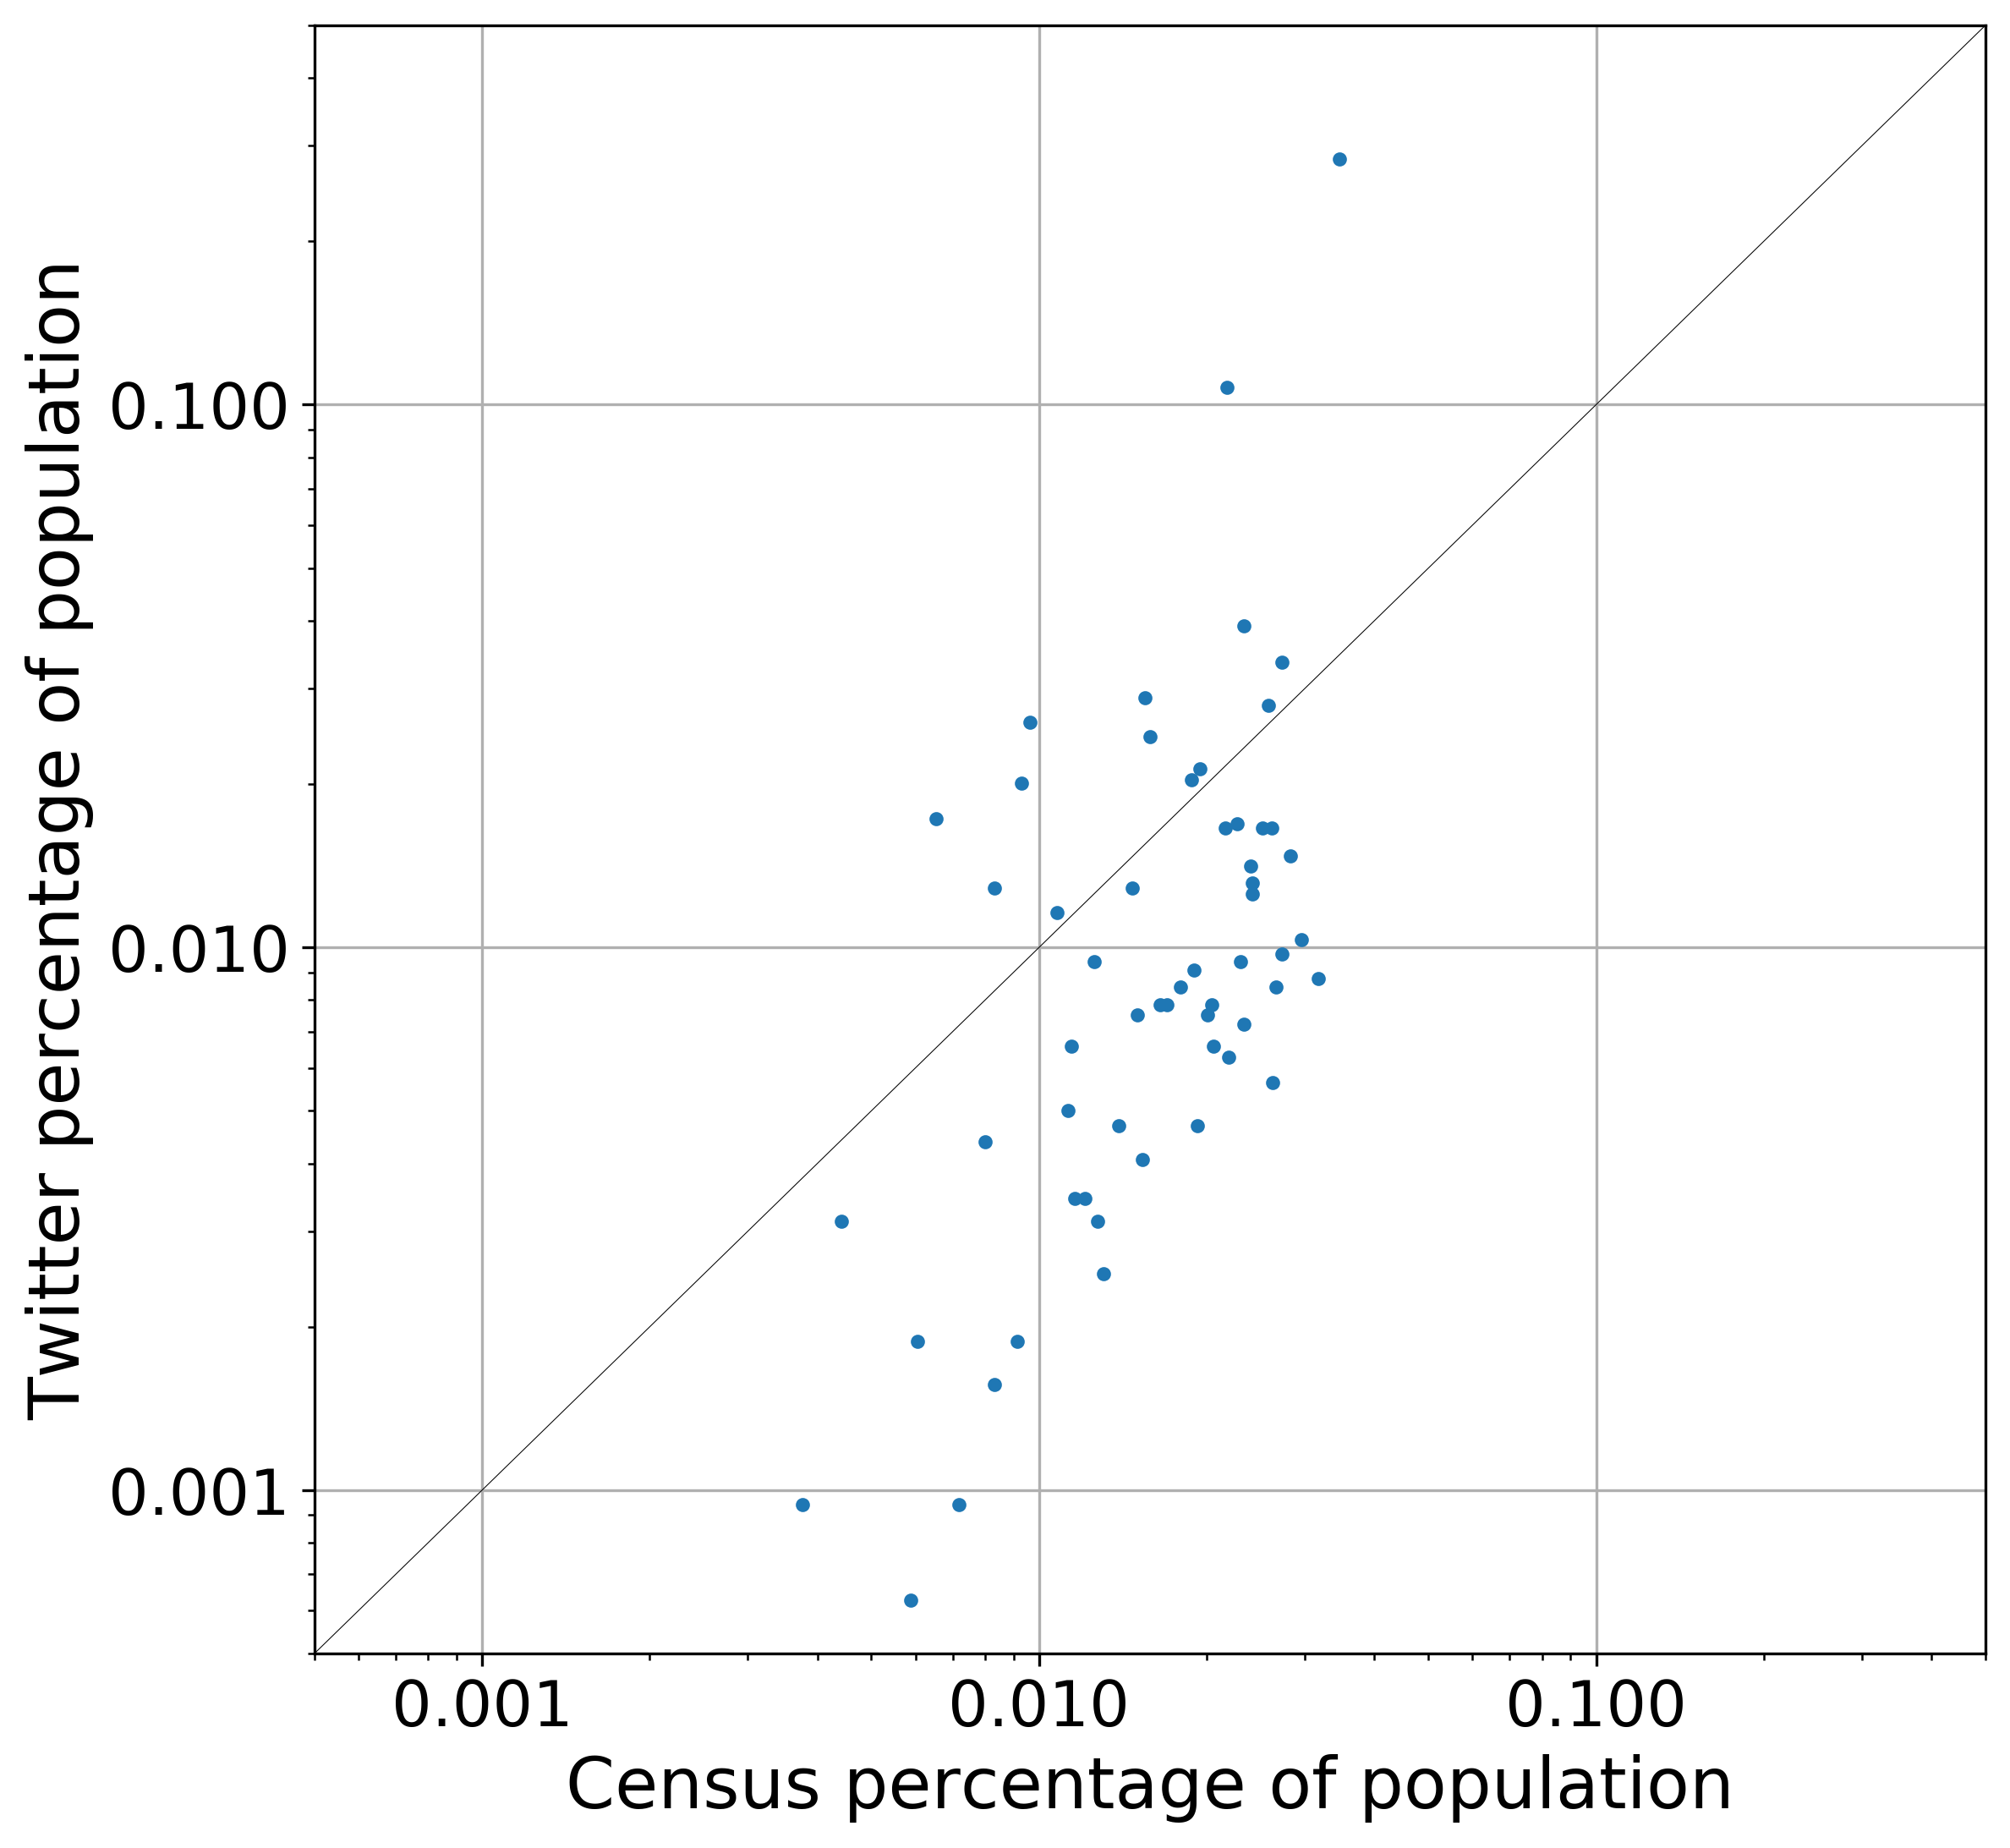

In [119]:
from matplotlib.ticker import ScalarFormatter
ax = poprep.plot_corr_aus_sao(study_zone)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set_xlim((0.0005, 0.5))
ax.set_ylim((0.0005, 0.5))